In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\Alex\AppData\Local\Temp\ipykernel_9572\1654069430.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
#Статистические методы
#boxplot

In [4]:
boston = pd.read_csv('boston.csv')

<Axes: xlabel='RM'>

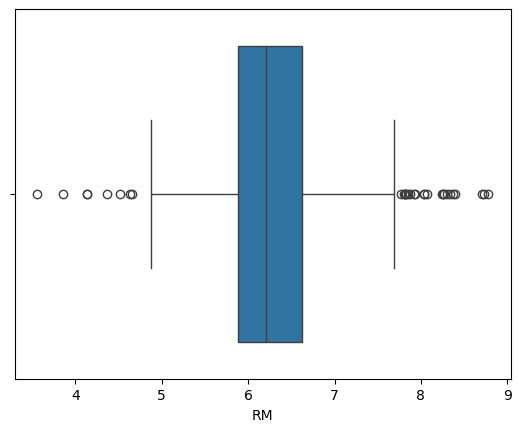

In [5]:
sns.boxplot(x = boston.RM)

In [6]:
#scatter plot

<Axes: xlabel='RM', ylabel='MEDV'>

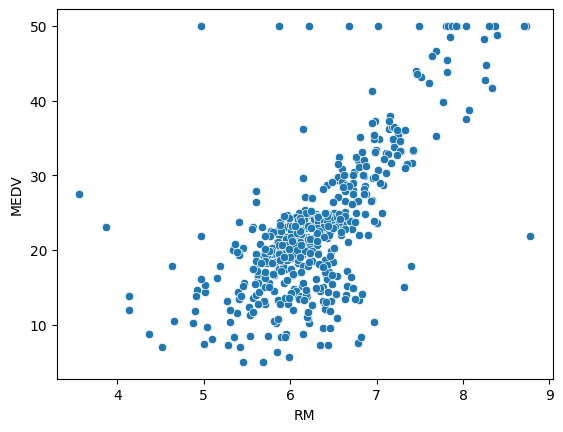

In [7]:
sns.scatterplot(x = boston.RM,y = boston.MEDV)

In [8]:
#z-score

In [9]:
from scipy import stats
 
z = stats.zscore(boston)
z.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,0.159686
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,-0.101524
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,1.324247
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,1.182758
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,1.487503


In [10]:
# найдем те значения, которые отклоняются больше чем на три СКО
# технически, метод .any() выводит True для тех строк (axis = 1), 
# где хотя бы одно значение True (т.е. > 3)
boston[(np.abs(z) > 3).any(axis = 1)].head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
55,0.01311,90.0,1.22,0.0,0.403,7.249,21.9,8.6966,5.0,226.0,17.9,395.93,4.81,35.4
56,0.02055,85.0,0.74,0.0,0.410,6.383,35.7,9.1876,2.0,313.0,17.3,396.90,5.77,24.7
57,0.01432,100.0,1.32,0.0,0.411,6.816,40.5,8.3248,5.0,256.0,15.1,392.90,3.95,31.6
102,0.22876,0.0,8.56,0.0,0.520,6.405,85.4,2.7147,5.0,384.0,20.9,70.80,10.63,18.6
141,1.62864,0.0,21.89,0.0,0.624,5.019,100.0,1.4394,4.0,437.0,21.2,396.90,34.41,14.4


In [11]:
# выведем True там, где в столбце RM значение меньше трех СКО
col_mask = np.where(np.abs(z.RM) < 3, True, False)
 
# применим маску к столбцу
boston.RM[col_mask].head()

0    6.575
1    6.421
2    7.185
3    6.998
4    7.147
Name: RM, dtype: float64

In [12]:
# если в строке (axis = 1) есть хотя бы один False как следствие условия np.abs(z) < 3
# метод .all() вернет логический массив, который можно использовать как фильтр
z_mask = (np.abs(z) < 3).all(axis = 1)
 
boston_z = boston[z_mask]
boston_z.shape

(415, 14)

In [13]:
boston[['RM', 'MEDV']].corr()

,RM,MEDV
RM,1.00000,0.69536
MEDV,0.69536,1.00000


In [15]:
boston_z[['RM', 'MEDV']].corr()

,RM,MEDV
RM,1.000000,0.734041
MEDV,0.734041,1.000000


In [16]:
#Измененный z-score

In [17]:
# рассчитаем MAD
median = boston.median()
dev_median = boston - (boston.median())
abs_dev_median = np.abs(dev_median)
MAD = abs_dev_median.median()
 
# рассчитаем измененный z-score
# добавим константу, чтобы избежать деления на ноль
zmod = (0.6745 * (boston - boston.median())) / (MAD + 1e-5)
 
# создадим фильтр
zmod_mask = (np.abs(zmod) < 3.5).all(axis = 1)
 
# выведем результат
boston_zmod = boston[zmod_mask]
boston_zmod.shape

(168, 14)

In [18]:
boston_zmod[['RM', 'MEDV']].corr().iloc[0, 1].round(3)

0.719

In [19]:
q1 = -0.6745
q3 = 0.6745
 
iqr = q3 - q1
 
lower_bound = q1 - (1.5 * iqr) 
upper_bound = q3 + (1.5 * iqr)
 
# тогда lower_bound и upper_bound почти равны трем СКО от среднего
# (было бы точнее, если использовать 1.75)
print(lower_bound, upper_bound)

-2.698 2.698


In [20]:
# найдем границы 1.5 * IQR
q1 = boston.RM.quantile(0.25)
q3 = boston.RM.quantile(0.75)
 
iqr = q3 - q1
 
lower_bound = q1 - (1.5 * iqr) 
upper_bound = q3 + (1.5 * iqr)
 
print(lower_bound, upper_bound)

4.778499999999999 7.730500000000001


In [21]:
# применим эти границы, чтобы найти выбросы в столбце RM
boston[(boston.RM < lower_bound) | (boston.RM > upper_bound)].head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
97,0.12083,0.0,2.89,0.0,0.445,8.069,76.0,3.4952,2.0,276.0,18.0,396.90,4.21,38.7
98,0.08187,0.0,2.89,0.0,0.445,7.820,36.9,3.4952,2.0,276.0,18.0,393.53,3.57,43.8
162,1.83377,0.0,19.58,1.0,0.605,7.802,98.2,2.0407,5.0,403.0,14.7,389.61,1.92,50.0
163,1.51902,0.0,19.58,1.0,0.605,8.375,93.9,2.1620,5.0,403.0,14.7,388.45,3.32,50.0
166,2.01019,0.0,19.58,0.0,0.605,7.929,96.2,2.0459,5.0,403.0,14.7,369.30,3.70,50.0


In [23]:
# найдем значения без выбросов (переворачиваем маску)
boston[~(boston.RM < lower_bound) | (boston.RM > upper_bound)].head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [24]:
# найдем границы 1.5 * IQR по каждому столбцу
Q1 = boston.quantile(0.25)
Q3 = boston.quantile(0.75)
IQR = Q3 - Q1
lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
 
# создадим маску для выбросов 
# (если хотя бы один выброс в строке (True), метод .any() сделает всю строку True
mask_out = ((boston < lower) | (boston > upper)).any(axis = 1)

In [25]:
# найдем выбросы во всем датафрейме
boston[mask_out].shape

(238, 14)

In [26]:
# возьмем датафрейм без выбросов
boston[~mask_out].shape

(268, 14)

In [28]:
# обратное условие, если все значения по всем строкам внутри границ
# метод .all() выдаст True
mask_no_out = ((boston >= lower) & (boston <= upper)).all(axis = 1)

In [29]:
# выведем датафрейм без выбросов
boston[mask_no_out].shape

(268, 14)

In [30]:
# выведем выбросы
boston[~mask_no_out].shape

(238, 14)

In [32]:
# сохраним результат
boston_iqr = boston[mask_no_out]

In [34]:
boston_iqr[['RM', 'MEDV']].corr()

,RM,MEDV
RM,1.000000,0.644819
MEDV,0.644819,1.000000


In [35]:
#Методы, основанные на модели

In [36]:
#Isolation Forest
#Изолирующий лес (Isolation Forest или iForest) использует принципы решающего дерева (Decision Tree) и построенного на его основе ансамблевого метода случайного леса (Random Forest).

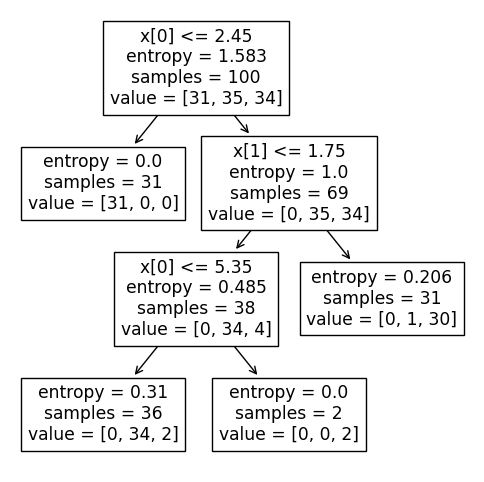

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
 
from sklearn.datasets import load_iris
iris = load_iris()
 
df = pd.DataFrame(iris.data[:,[2,3]], columns = ['petal_l', 'petal_w'])
df['target'] = iris.target
 
X = df[['petal_l', 'petal_w']]
y = df.target
 
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 1/3,
                                                    random_state = 42)
 
 
clf = DecisionTreeClassifier(criterion = 'entropy',
                             max_leaf_nodes = 4,
                             random_state = 42)
 
clf.fit(X_train, y_train)
 
plt.figure(figsize = (6,6))
tree.plot_tree(clf)
plt.show()

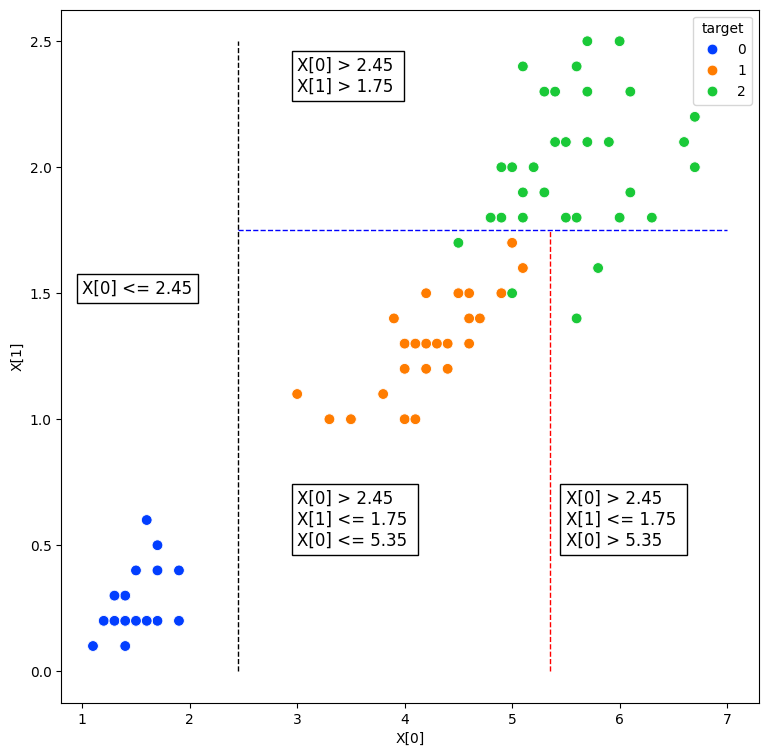

In [38]:
plt.figure(figsize = (9,9))
ax = plt.axes()
 
sns.scatterplot(x = X_train.petal_l, y = X_train.petal_w, hue = df.target, palette = 'bright', s = 60)
 
ax.vlines(x = 2.45, ymin = 0, ymax = 2.5, linewidth = 1, color = 'k', linestyles = '--')
ax.text(1, 1.5, 'X[0] <= 2.45', fontsize = 12, bbox = dict(facecolor = 'none', edgecolor = 'k'))
 
ax.hlines(y = 1.75, xmin = 2.45, xmax = 7, linewidth = 1, color = 'b', linestyles = '--')
ax.text(3, 2.3, 'X[0] > 2.45 \nX[1] > 1.75', fontsize = 12, bbox = dict(facecolor = 'none', edgecolor = 'k'))
 
ax.vlines(x = 5.35, ymin = 0, ymax = 1.75, linewidth = 1, color = 'r', linestyles = '--')
ax.text(3, 0.5, 'X[0] > 2.45 \nX[1] <= 1.75 \nX[0] <= 5.35', fontsize = 12, bbox = dict(facecolor = 'none', edgecolor = 'k'))
ax.text(5.5, 0.5, 'X[0] > 2.45 \nX[1] <= 1.75 \nX[0] > 5.35', fontsize = 12, bbox = dict(facecolor = 'none', edgecolor = 'k'))
 
plt.xlabel('X[0]')
plt.ylabel('X[1]')
 
plt.show()

In [39]:
#Показатель аномальности

In [40]:
# IsolationForest в sklearn

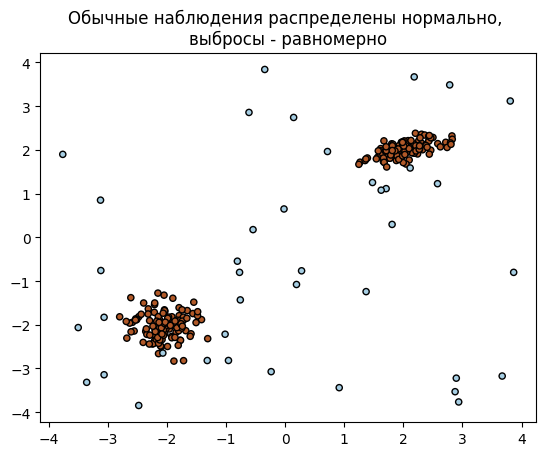

In [41]:
from sklearn.model_selection import train_test_split
 
# зададим количество обычных наблюдений и выбросов
n_samples, n_outliers = 120, 40
rng = np.random.RandomState(0)
 
 
# создадим вытянутое (за счет умножения на covariance)
covariance = np.array([[0.5, -0.1], [0.7, 0.4]])
# и сдвинутое вверх вправо
shift = np.array([2, 2])
# облако объектов
cluster_1 = 0.4 * rng.randn(n_samples, 2) @ covariance + shift
 
# создадим сферическое и сдвинутое вниз влево облако объектов
cluster_2 = 0.3 * rng.randn(n_samples, 2) + np.array([-2, -2])
 
# создадим выбросы
outliers = rng.uniform(low = -4, high = 4, size = (n_outliers, 2))
 
# создадим пространство из двух признаков
X = np.concatenate([cluster_1, cluster_2, outliers])
 
# а также целевую переменную (1 для обычных наблюдений, -1 для выбросов)
y = np.concatenate(
    [np.ones((2 * n_samples), dtype = int),
     -np.ones((n_outliers), dtype=int)]
     )
 
scatter = plt.scatter(X[:, 0], X[:, 1],
                      c = y, 
                      cmap = 'Paired', 
                      s = 20,
                      edgecolor = 'k')
 
plt.title('Обычные наблюдения распределены нормально, \nвыбросы - равномерно')
 
plt.show()

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify = y,
                                                    random_state = 42)
 
# параметр stratify сделает так, что и в тестовой, и в обучающей выборке
# будет одинаковая доля выбросов
_, y_train_counts = np.unique(y_train, return_counts = True)
_, y_test_counts = np.unique(y_test, return_counts = True)
 
np.round(y_train_counts/len(y_train), 2), np.round(y_test_counts/len(y_test), 2)

(array([0.14, 0.86]), array([0.14, 0.86]))

In [43]:
from sklearn.ensemble import IsolationForest
 
# обучим алгоритм
isof = IsolationForest(max_samples = len(X_train), random_state = 0)
isof.fit(X_train)

IsolationForest(max_samples=210, random_state=0)

In [44]:
y_pred = isof.predict(X_test)
 
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9428571428571428

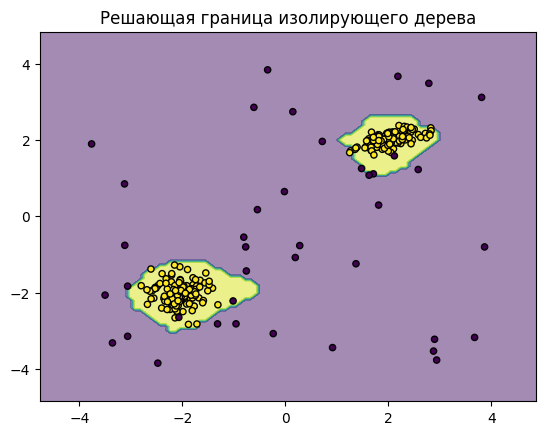

In [45]:
from sklearn.inspection import DecisionBoundaryDisplay
 
disp = DecisionBoundaryDisplay.from_estimator(
    isof,
    X,
    response_method = 'predict',
    alpha = 0.5,
)
disp.ax_.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor="k")
disp.ax_.set_title('Решающая граница изолирующего дерева')
plt.show()

In [46]:
#Датасет boston

In [47]:
X_boston = boston.drop(columns = 'MEDV')
y_boston = boston.MEDV
 
clf = IsolationForest(max_samples = 100, random_state = 0)
clf.fit(X_boston)
 
# создадим столбец с anomaly_score
boston['scores'] = clf.decision_function(X_boston)
# и результатом (выброс (-1) или нет (1))
boston['anomaly'] = clf.predict(X_boston)
 
# посмотрим на количество выбросов
boston[boston.anomaly == -1].shape[0]

106

<Axes: xlabel='RM', ylabel='MEDV'>

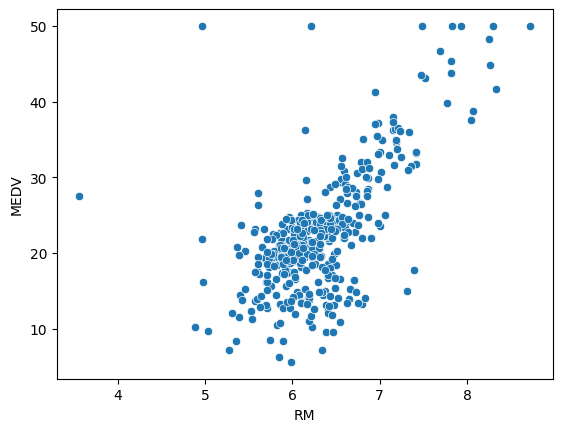

In [49]:
boston_ifor = boston[boston.anomaly == 1]
sns.scatterplot(x = boston_ifor.RM, y = boston_ifor.MEDV)

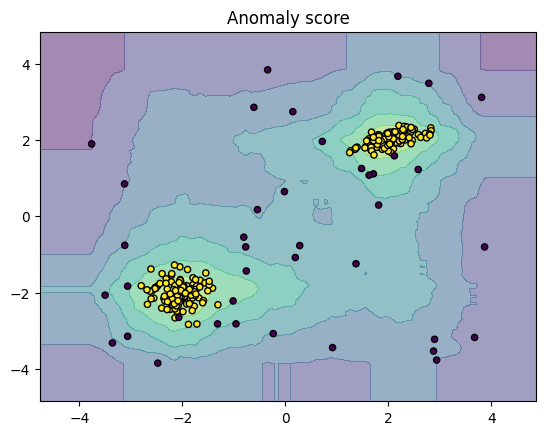

In [50]:
disp = DecisionBoundaryDisplay.from_estimator(
    isof,
    X,
    response_method = 'decision_function',
    alpha = 0.5,
)
disp.ax_.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor="k")
disp.ax_.set_title('Anomaly score')
plt.show()